<a href="https://colab.research.google.com/github/quoctrung2005/TTNT/blob/main/CAIDAT_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- BƯỚC 3: Phân bố dữ liệu ban đầu (100 mẫu) ---


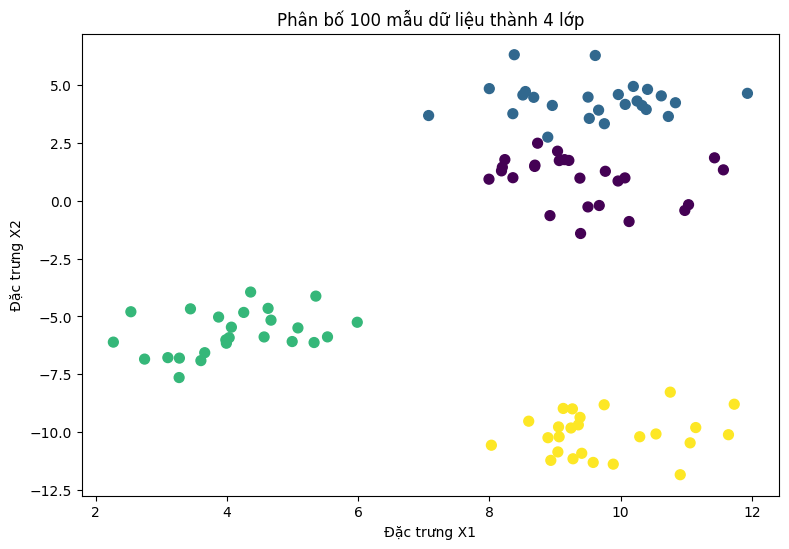


--- BƯỚC 4: Tập Test (Dữ liệu gốc) ---


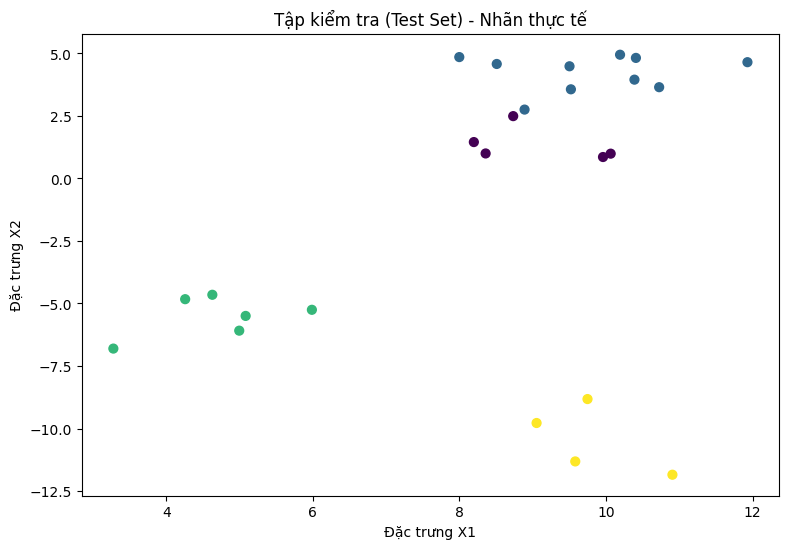


--- BƯỚC 5: Kết quả dự đoán với k=5 ---
Độ chính xác (k=5): 0.96


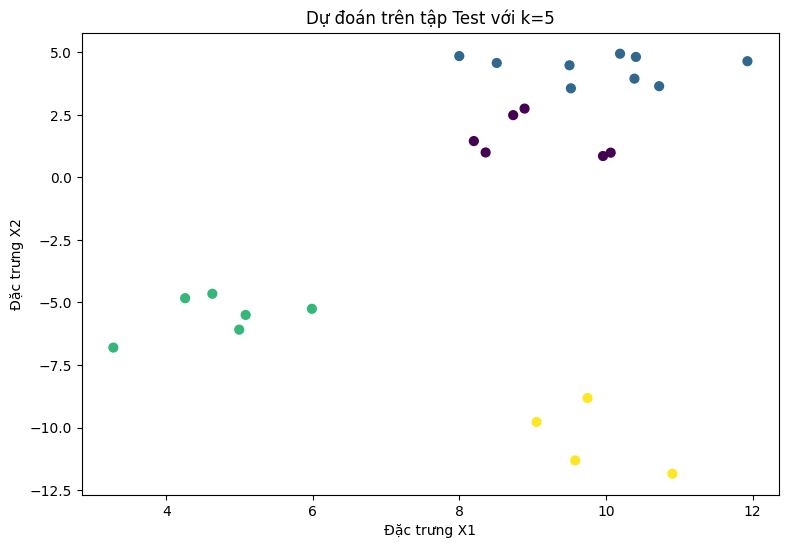


--- BƯỚC 6: Kết quả dự đoán với k=1 ---
Độ chính xác (k=1): 0.96


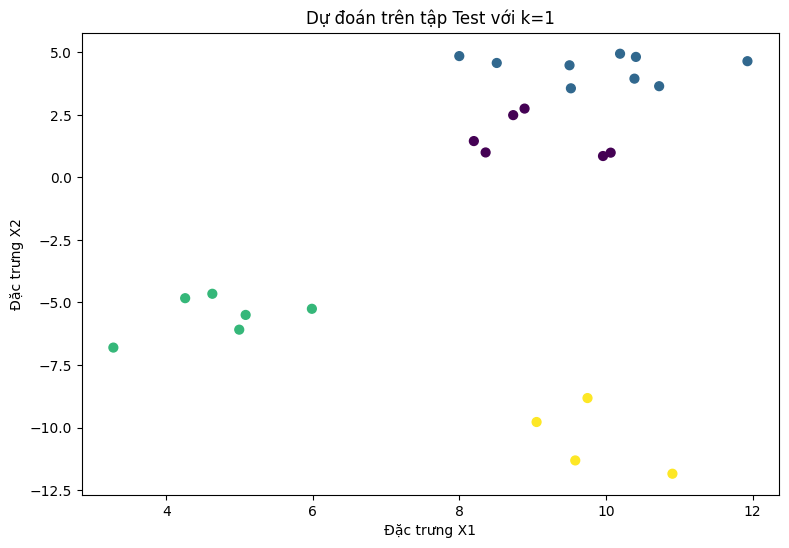


--- TÌM K TỐI ƯU BẰNG GridSearchCV ---
Các tham số tốt nhất: {'n_neighbors': np.int64(2)}
Độ chính xác tốt nhất (Best k Score): 0.99

--- ỨNG DỤNG HÀM KNN TÙY CHỈNH ---
Dự đoán nhãn cho điểm (1, 3) với k=3 là: [0]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # datavisualization
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # kNN classifier
from sklearn.model_selection import train_test_split # train and test sets, GridSearchCV
from sklearn.model_selection import GridSearchCV

# ---  KHỞI TẠO DỮ LIỆU (100 mẫu) ---
X, y = make_blobs(n_samples=100, n_features=2, centers=4,
                  cluster_std=1, random_state=4)

# ---  XEM PHÂN BỐ DỮ LIỆU ---
print("--- BƯỚC 3: Phân bố dữ liệu ban đầu (100 mẫu) ---")
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.title('Phân bố 100 mẫu dữ liệu thành 4 lớp')
plt.xlabel('Đặc trưng X1')
plt.ylabel('Đặc trưng X2')
plt.show()

# ---CHIA DỮ LIỆU (Train 75%, Test 25%) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Trực quan hóa tập Test (Hình gốc để so sánh)
print("\n--- BƯỚC 4: Tập Test (Dữ liệu gốc) ---")
plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=40)
plt.title('Tập kiểm tra (Test Set) - Nhãn thực tế')
plt.xlabel('Đặc trưng X1')
plt.ylabel('Đặc trưng X2')
plt.show()

# --- HUẤN LUYỆN VÀ ĐÁNH GIÁ VỚI k=5 ---
knn5 = KNeighborsClassifier(5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
print("\n--- BƯỚC 5: Kết quả dự đoán với k=5 ---")
print(f"Độ chính xác (k=5): {knn5.score(X_test, y_test):.2f}")
plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5, marker='o', s=40)
plt.title('Dự đoán trên tập Test với k=5')
plt.xlabel('Đặc trưng X1')
plt.ylabel('Đặc trưng X2')
plt.show()

# ---HUẤN LUYỆN VÀ ĐÁNH GIÁ VỚI k=1 ---
knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
print("\n--- BƯỚC 6: Kết quả dự đoán với k=1 ---")
print(f"Độ chính xác (k=1): {knn1.score(X_test, y_test):.2f}")
plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1, marker='o', s=40)
plt.title('Dự đoán trên tập Test với k=1')
plt.xlabel('Đặc trưng X1')
plt.ylabel('Đặc trưng X2')
plt.show()

# --- TÌM K TỐI ƯU TỰ ĐỘNG (Sử dụng dữ liệu X ban đầu 100 mẫu) ---
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid={'n_neighbors': np.arange(1, 10)}, cv=5)
knn_grid.fit(X, y)
best_k = knn_grid.best_params_['n_neighbors']
print("\n--- TÌM K TỐI ƯU BẰNG GridSearchCV ---")
print(f"Các tham số tốt nhất: {knn_grid.best_params_}")
print(f"Độ chính xác tốt nhất (Best k Score): {knn_grid.best_score_:.2f}")


# --- VIẾT HÀM DÁN NHÃN DỮ LIỆU k-NN TÙY CHỈNH ---
def KNN(X_train, X_test, y_train, k):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]

    # Tính toán khoảng cách (chỉ cần tính toán cho từng điểm test)
    results = []
    for i in range(num_test):
        # Tính khoảng cách Euclidean từ điểm test thứ i tới tất cả điểm train
        distances = np.sqrt(np.sum(np.power(X_test[i, :] - X_train, 2), axis=1))

        # Ghép khoảng cách với nhãn, sắp xếp và lấy k láng giềng gần nhất
        zipped = zip(distances, y_train)
        res = sorted(zipped, key=lambda x: x[0])
        results_topk = res[:k]

        # Đếm số lượng của mỗi class trong top k
        classes = {}
        for _, j in results_topk:
            j = int(j)
            classes[j] = classes.get(j, 0) + 1

        # Trả về class có số lượng nhiều nhất
        results.append(max(classes, key=classes.get))

    return np.array(results)

# --- ỨNG DỤNG HÀM KNN TỰ VIẾT ---
# Khởi tạo tập dữ liệu lớn hơn để test (500 mẫu)
(X_500, y_500) = make_blobs(n_samples=500, n_features=2, centers=4,
                            cluster_std=1, random_state=4)
X_test_new = np.array([(1, 3)])

# Sử dụng hàm KNN tự viết với k=3 (hoặc dùng 'best_k' tìm được ở trên)

k_predict = 3
results = KNN(X_500, X_test_new, y_500, k_predict)

print(f"\n--- ỨNG DỤNG HÀM KNN TÙY CHỈNH ---")
print(f"Dự đoán nhãn cho điểm (1, 3) với k={k_predict} là: {results}")

# Ứng dụng k tối ưu tìm được từ GridSearchCV (giả sử k=5)
# results_best_k = KNN(X_500, X_test_new, y_500, best_k)
# print(f"Dự đoán nhãn cho điểm (1, 3) với k tối ưu ({best_k}) là: {results_best_k}")